# Assignment 1

## Read data

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Read training data
D = pd.read_csv("data/DST_BIL54.csv")

# Equivalent di str(D) in R
print(D.info())
print(D.head())

D["time"] = pd.to_datetime(D["time"].astype(str) + "-01", format="%Y-%m-%d", utc=True)

print(D["time"])
print(D["time"].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          84 non-null     object
 1   total         84 non-null     int64 
 2   gasoline      84 non-null     int64 
 3   diesel        84 non-null     int64 
 4   fgas          84 non-null     int64 
 5   ngas          84 non-null     int64 
 6   electricity   84 non-null     int64 
 7   petroleum     84 non-null     int64 
 8   hydrogen      84 non-null     int64 
 9   methanol      84 non-null     int64 
 10  ethanol       84 non-null     int64 
 11  pluginhybrid  84 non-null     int64 
 12  otherfuels    84 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 8.7+ KB
None
      time    total  gasoline   diesel  fgas  ngas  electricity  petroleum  \
0  2018-01  2930483   1781826  1136656    12   256         9304          0   
1  2018-02  2934044   1783338  1138414    12   255     

## 1. Plot data

In [166]:
D["year"] = D["time"].dt.year + (D["time"].dt.month - 1) / 12.0

# Make output variable floating point and scale
D["total"] = pd.to_numeric(D["total"], errors="coerce") / 1e6

# Divide into train and test set
teststart = pd.Timestamp("2024-01-01", tz="UTC")
Dtrain = D[D["time"] < teststart].copy()
Dtest  = D[D["time"] >= teststart].copy()

[2.930483 2.934044 2.941422 2.951498 2.963093 2.973721 2.976096 2.985537
 2.983209 2.982473 2.98453  2.984123 2.988432 2.991279 3.002834 3.008125
 3.016558 3.025807 3.027397 3.034273 3.03348  3.03097  3.03212  3.03209
 3.036213 3.037617 3.036205 3.040346 3.04856  3.060994 3.072466 3.081409
 3.085458 3.087414 3.091698 3.100222 3.139166 3.139557 3.154415 3.162174
 3.173165 3.185814 3.191486 3.19945  3.200838 3.198798 3.198864 3.204309
 3.202713 3.20372  3.209522 3.215399 3.21942  3.223647 3.222857 3.223624
 3.218379 3.210424 3.207359 3.209511 3.205688 3.204567 3.210827 3.216852
 3.221263 3.228278 3.227684 3.228835 3.226588 3.220559 3.22192  3.227541] [3.223801 3.223805 3.231177 3.237629 3.244611 3.255073 3.254569 3.25806
 3.256515 3.252275 3.253059 3.258025]


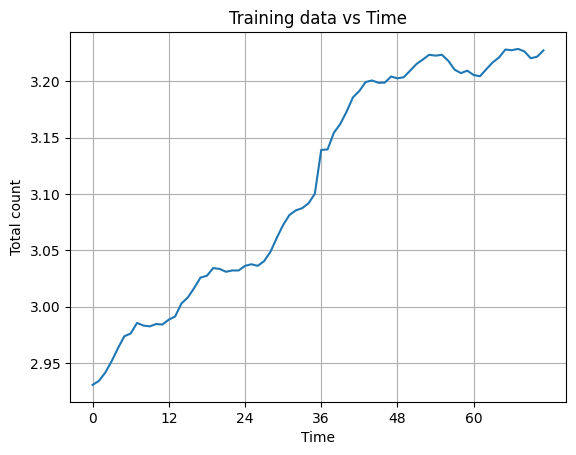

In [167]:
X = Dtrain["year"].values

y = Dtrain["total"].to_numpy()          # heights
n = len(y)
y_test = Dtest["total"].to_numpy()

print(y, y_test)
x_labels = [f"x{i}" for i in range(1, n+1)]  # x1..xn
x_pos = np.arange(n)                         # 0..n-1 positions

#plt.figure()
#plt.bar(x_pos, y)

#plt.xticks(x_pos, x_labels, rotation=90)  # rotate so labels fit
#plt.xlabel("Observations (x1..x{})".format(n))
#plt.ylabel("Total (millions)")
#plt.title("Total values for training set")
#plt.tight_layout()



plt.plot(x_pos,y)
plt.xticks(np.arange(0, n, 12))   # tick κάθε 12 μονάδες
plt.xlabel("Time")
plt.ylabel("Total count")
plt.title("Training data vs Time")
plt.grid(True)
plt.show()


#plt.show()
#print("Train shape:", Dtrain.shape)
##print("Test shape:", Dtest.shape)
#Dtrain.to_csv("train.csv", index=False)
#Dtest.to_csv("test.csv", index=False)

The time series exhibits a clear upward trend over the entire observation period. At the beginning of 2018, the total count is approximately 2.94 million, and it gradually increases to nearly 3.24 million by the end of 2023. The growth appears relatively smooth, with only minor short-term fluctuations around the overall trend.

During the period corresponding to the COVID-19 pandemic (2020–2021), there is no substantial decline in the series. Instead, the upward trend continues, suggesting that the pandemic did not significantly reduce the overall number of vehicles. The series maintains a steady increase throughout the entire period.

## 2. Defining X and y

In [168]:
y3 = Dtrain["total"].to_numpy()
x3 = Dtrain["year"].to_numpy()
x3 = np.c_[np.ones(x3.shape), x3]   # adds a column of 1s in front

print(x3)  # should be [2018. , 2018.0833..., 2018.1666...]
print(y3.shape)  # your first 3 totals (in millions)

[[1.00000000e+00 2.01800000e+03]
 [1.00000000e+00 2.01808333e+03]
 [1.00000000e+00 2.01816667e+03]
 [1.00000000e+00 2.01825000e+03]
 [1.00000000e+00 2.01833333e+03]
 [1.00000000e+00 2.01841667e+03]
 [1.00000000e+00 2.01850000e+03]
 [1.00000000e+00 2.01858333e+03]
 [1.00000000e+00 2.01866667e+03]
 [1.00000000e+00 2.01875000e+03]
 [1.00000000e+00 2.01883333e+03]
 [1.00000000e+00 2.01891667e+03]
 [1.00000000e+00 2.01900000e+03]
 [1.00000000e+00 2.01908333e+03]
 [1.00000000e+00 2.01916667e+03]
 [1.00000000e+00 2.01925000e+03]
 [1.00000000e+00 2.01933333e+03]
 [1.00000000e+00 2.01941667e+03]
 [1.00000000e+00 2.01950000e+03]
 [1.00000000e+00 2.01958333e+03]
 [1.00000000e+00 2.01966667e+03]
 [1.00000000e+00 2.01975000e+03]
 [1.00000000e+00 2.01983333e+03]
 [1.00000000e+00 2.01991667e+03]
 [1.00000000e+00 2.02000000e+03]
 [1.00000000e+00 2.02008333e+03]
 [1.00000000e+00 2.02016667e+03]
 [1.00000000e+00 2.02025000e+03]
 [1.00000000e+00 2.02033333e+03]
 [1.00000000e+00 2.02041667e+03]
 [1.000000

## 3. OLS

To calculate $\hat{\theta}$ we can use the following formula:
$$ \hat{\theta} = (x^T x)^{-1} x^T Y$$

In [169]:
x3t = np.transpose(x3)
A = np.linalg.inv(x3t @ x3)
B = x3t @ y3
theta = A @ B
print(theta.shape)
print(theta)

(2,)
[-1.10355428e+02  5.61445562e-02]


In [170]:
# Ensure y is (N,1)
y3 = y3.reshape(-1, 1) if y3.ndim == 1 else y3
x3 = x3  # design matrix (N,2)

print("X shape:", x3.shape, "y shape:", y3.shape)
print("first row X:", x3[0:2], "first y:", y3[0,0])

X shape: (72, 2) y shape: (72, 1)
first row X: [[1.00000000e+00 2.01800000e+03]
 [1.00000000e+00 2.01808333e+03]] first y: 2.930483


sigma_sq: 0.0006828256631928707
sigma1, sigma2: 3.5935811220840224 0.0017781563049965035


/var/folders/k2/cw789rgd7t53shmyz_sn13bc0000gn/T/ipykernel_31013/120611838.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_sq = float((C.T @ C) / (n - p))                   # scalar!


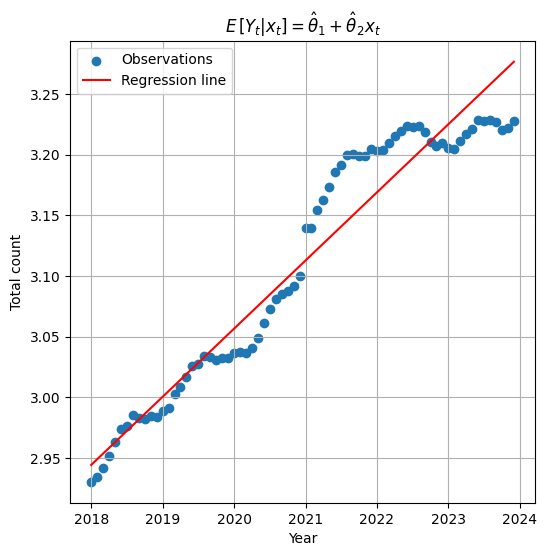

In [171]:
n = x3.shape[0]
p = 2

# force consistent shapes
y = y3.reshape(-1, 1) if y3.ndim == 1 else y3          # (n,1)
theta_col = theta.reshape(-1, 1) if theta.ndim == 1 else theta  # (2,1)

C = y - x3 @ theta_col                                  # (n,1)

sigma_sq = float((C.T @ C) / (n - p))                   # scalar!

x_s = x3[:, 1]
x_mean = np.mean(x_s)
S_xx = np.sum((x_s - x_mean)**2)

sigma1 = np.sqrt(sigma_sq * (1/n + (x_mean**2)/S_xx))
sigma2 = np.sqrt(sigma_sq / S_xx)

print("sigma_sq:", sigma_sq)
print("sigma1, sigma2:", sigma1, sigma2)
x_plot = np.linspace(x3[0, 1], x3[-1, 1], 1000)
f = lambda x: theta[0] + x * theta[1]

plt.figure(figsize=(6,6))
plt.scatter(x3[:, 1], y3, label='Observations')
plt.plot(x_plot, f(x_plot), label='Regression line', color ='r')
plt.xlabel('Year')
plt.ylabel('Total count')
plt.title("$E\,[Y_t | x_t]= \hat{\\theta}_1 + \hat{\\theta}_2x_t$")
plt.grid(True)
plt.legend();


In [172]:
sigma = float(np.sqrt(sigma_sq))
x_test = Dtest["year"].values
y_pred = theta[0] + theta[1] * x_test
y_real = y_pred + np.random.normal(0, sigma, size=len(x_test))

#df = pd.DataFrame({"x_t": x_test, "y_t": y_pred})
#print(df)

df = pd.DataFrame({"x_t": x_test, "y_t": y_real})
print( df)

            x_t       y_t
0   2024.000000  3.251904
1   2024.083333  3.253597
2   2024.166667  3.287321
3   2024.250000  3.325407
4   2024.333333  3.306180
5   2024.416667  3.281163
6   2024.500000  3.320190
7   2024.583333  3.362408
8   2024.666667  3.281525
9   2024.750000  3.307187
10  2024.833333  3.342165
11  2024.916667  3.381167


In [173]:
def prediction_interval_ols(x_train, theta, sigma_sq, x_new, alpha=0.05):
    """
    1D OLS with intercept: y = theta[0] + theta[1]*x
    Returns: yhat, lower, upper for x_new (scalar or array)
    """
    x_train = np.asarray(x_train, dtype=float)
    x_new   = np.asarray(x_new, dtype=float)

    n = len(x_train)
    xbar = x_train.mean()
    Sxx  = np.sum((x_train - xbar)**2)

    sigma = float(np.sqrt(sigma_sq))
    tcrit = t.ppf(1 - alpha/2, df=n-2)

    yhat = theta[0] + theta[1]*x_new

    # prediction SE (note the +1 term!)
    se_pred = sigma * np.sqrt(1 + 1/n + (x_new - xbar)**2 / Sxx)

    lower = yhat - tcrit * se_pred
    upper = yhat + tcrit * se_pred
    return yhat, lower, upper

pred_int = prediction_interval_ols(x3[:, 1], theta, sigma_sq, x_test)

(72,)
(72,)


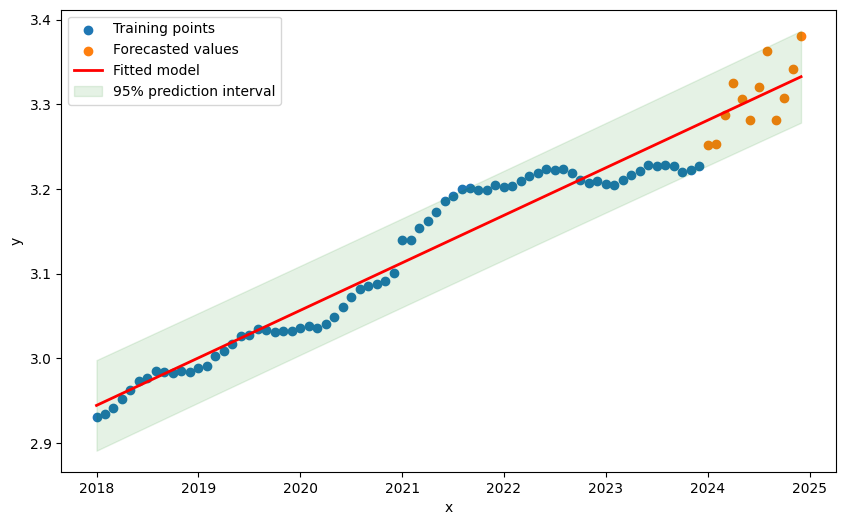

In [ ]:
X = np.asarray(X, dtype=float)
y = np.asarray(y, dtype=float).ravel()
x_test  = np.asarray(x_test,  dtype=float)
y_test  = np.asarray(y_test,  dtype=float)
theta   = np.asarray(theta,   dtype=float)

# fitted function
f = lambda x: theta[0] + theta[1]*x

# ---- estimate sigma^2 from training residuals ----
n = len(X)
yhat_train = f(X)
print(y.shape)
print(yhat_train.shape)
resid = y - yhat_train
sigma_sq = np.sum(resid**2) / (n - 2)
sigma = np.sqrt(sigma_sq)

# ---- pieces for PI ----
xbar = X.mean()
Sxx  = np.sum((X - xbar)**2)
tcrit = t.ppf(0.975, df=n-p)  # 95% PI

# x grid for smooth line + band
x_plot = np.linspace(min(X.min(), x_test.min()),
                     max(X.max(), x_test.max()),
                     200)

yhat_plot = f(x_plot)
se_pred_plot = sigma * np.sqrt(1 + 1/n + (x_plot - xbar)**2 / Sxx)  # PI (note +1)
lo_plot = yhat_plot - tcrit * se_pred_plot
hi_plot = yhat_plot + tcrit * se_pred_plot

# ---- plot ----
plt.figure(figsize=(10,6))

plt.scatter(X, y, label='Training points', )
#plt.scatter(x_test, y_test, label='Test points')
plt.scatter(x_test, y_real, label="Forecasted values")

plt.plot(x_plot, yhat_plot, label='Fitted model', linewidth=2, color='r')
plt.fill_between(x_plot, lo_plot, hi_plot, alpha=0.1, label='95% prediction interval', color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [175]:
r = y_test - y_real
print(r)

[-0.02810259 -0.02979208 -0.05614449 -0.08777767 -0.06156856 -0.02608998
 -0.06562062 -0.10434843 -0.02501042 -0.05491186 -0.08910581 -0.12314215]


## 4. WLS


Sum of WLS weights (lambda=0.9): 9.9949
Sum of OLS weights (N): 72


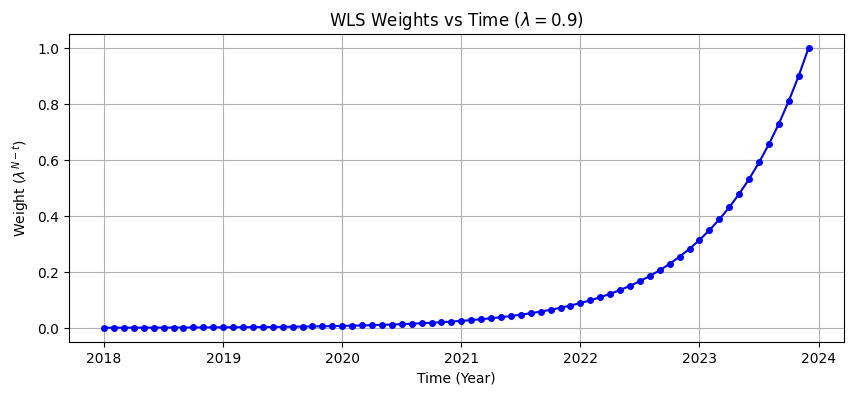

WLS Parameter Estimates (lambda=0.9):


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [182]:
lmbda = 0.9
n_train = len(y) # number of training observations

# The weights are defined as lambda^(N-t), where N is the latest timepoint 
weights = np.array([lmbda**(n_train - i) for i in range(1, n_train + 1)])

# The weight matrix W for WLS
W = np.diag(weights)

sum_wls_weights = np.sum(weights)
sum_ols_weights = n_train

print(f"Sum of WLS weights (lambda={lmbda}): {sum_wls_weights:.4f}")
print(f"Sum of OLS weights (N): {sum_ols_weights}")

# Plotting the weights to visualize the local model
plt.figure(figsize=(10, 4))
plt.plot(Dtrain["year"], weights, 'o-', color='blue', markersize=4)
plt.title(f"WLS Weights vs Time ($\lambda = {lmbda}$)")
plt.xlabel("Time (Year)")
plt.ylabel("Weight ($\lambda^{N-t}$)")
plt.grid(True)
plt.show()

# 4.4 Estimating WLS Parameters 
X_train = np.c_[np.ones(n_train), Dtrain["year"].values]
y_train = y 

# theta_wls = (X^T * W * X)^-1 * X^T * W * y
XtWX = X_train.T @ W @ X_train
XtWy = X_train.T @ W @ y_train
theta_wls = np.linalg.inv(XtWX) @ XtWy

print(f"WLS Parameter Estimates (lambda={lmbda}):")
print(f"theta1 (Intercept): {theta_wls[0]:.4f}")
print(f"theta2 (Slope): {theta_wls[1]:.4f}")

# 4.5
x_test_val = Dtest["year"].values
# Prediction: y_pred = theta1 + theta2 * x_test
y_pred_wls = theta_wls[0] + theta_wls[1] * x_test_val

# Visualizing OLS vs WLS predictions
plt.figure(figsize=(12, 6))
plt.plot(Dtrain["year"], y_train, 'k.', label="Training Data")
plt.plot(Dtest["year"], y_test, 'ko', mfc='none', label="Actual Test Data")
plt.plot(Dtest["year"], y_pred, 'r--', label="OLS Forecast (Global)") # from previous task [cite: 36]
plt.plot(Dtest["year"], y_pred_wls, 'g-', label=f"WLS Forecast (Local, $\lambda={lmbda}$)")

plt.title("Comparison of Global (OLS) and Local (WLS) Linear Trend Models")
plt.xlabel("Time (Year)")
plt.ylabel("Total Vehicles (millions)")
plt.legend()
plt.grid(True)
plt.show()

## 5. RLS

In [200]:
#R_t= np.array([[0.1, 0],[0, 0.1]])
R_t = 1e-15 * np.eye(2)

theta_t = np.array([[0],[0]])

thetas=[theta_t]
for i in np.arange(72):
    X_t = np.array([[1.0], [x3[i, 1]]])
    R_t = R_t + X_t @ X_t.T
    e_t = y3[i]-X_t.T@theta_t
    theta_t = theta_t + np.linalg.solve(R_t, X_t*e_t)
    thetas.append(theta_t)

thetas = np.array(thetas)
print(f"OLS thetas {theta.round(3)} VS RLS thetas {theta_t}")

OLS thetas [-1.10355e+02  5.60000e-02] VS RLS thetas [[-1.10355428e+02]
 [ 5.61445562e-02]]
